### 论文图片只能用黑白的，我之前存的全是彩色的，好烦！还好把结果数据都保存了下来，在这里将其转换。(黑白图好丑啊)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


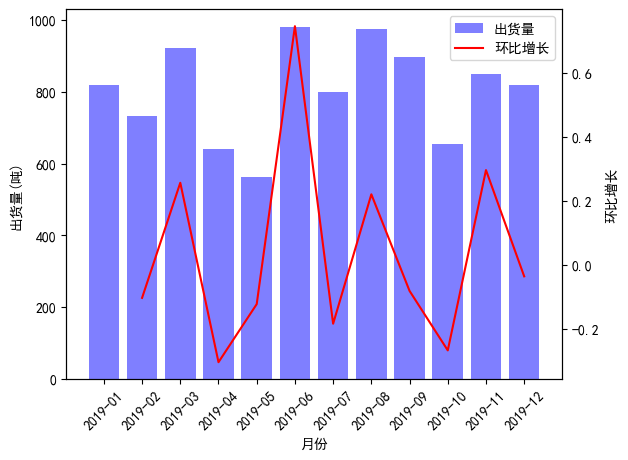

In [2]:
import matplotlib.pyplot as plt
import numpy as np
 
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
 
if __name__ == '__main__':
    X=["2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12"]
    Y1=np.random.randint(500,1000,12)
    Y2=[None]
    for i in range(1,len(Y1)):
        Y2.append((Y1[i]-Y1[i-1])/Y1[i-1])
 
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
 
    ax1.bar(X, Y1, color="blue", alpha=0.5, label="出货量")
    ax1.set_xlabel("月份")
    ax1.set_ylabel("出货量(吨)")
 
    ax2 = ax1.twinx()
    ax2.plot(X, Y2, color="red", label="环比增长")
    ax2.set_ylabel("环比增长")
 
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    plt.show()

### 经纬度数据分布图

In [14]:
def distribution_scatter(df):
    '''
        传入df数据结构，绘制经纬度散点图
    '''
    plt.figure(1 , figsize = (15 , 6))
    plt.scatter(x = 'latitude' , y = 'longitude' , color = 'k',data = df ,
                    s = 80 , alpha = 0.5 )
    plt.xlabel('纬度' ), plt.ylabel('经度') 
    plt.title('经纬度分布图')
    plt.savefig('../GIS_LSH_VE_CF/bw_picture/location.jpg',dpi=500)
    plt.show()


In [9]:
import pandas as pd
data = pd.read_table("data/data.csv",sep=",",names=['latitude','longitude'])

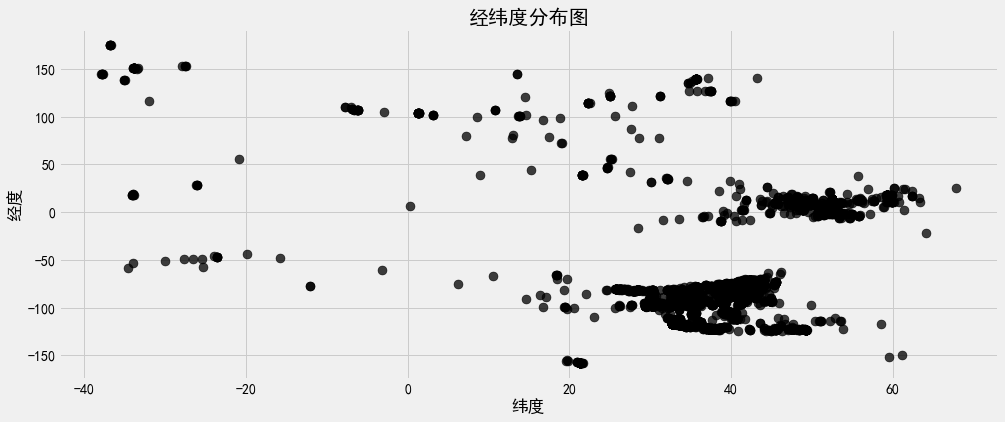

In [15]:
plt.style.use('fivethirtyeight') 
distribution_scatter(data)

### cf图片

In [2]:
data_item = [2000,4000,6000,8000,10000]
bits_dic =  [2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142]
times =  [381.67915081977844, 757.9141619205475, 1146.3556566238403, 1511.9732131958008, 1920.1025586128235]


各个算法的误差为:[2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142]
各个所用的时间为[381.67915081977844, 757.9141619205475, 1146.3556566238403, 1511.9732131958008, 1920.1025586128235]


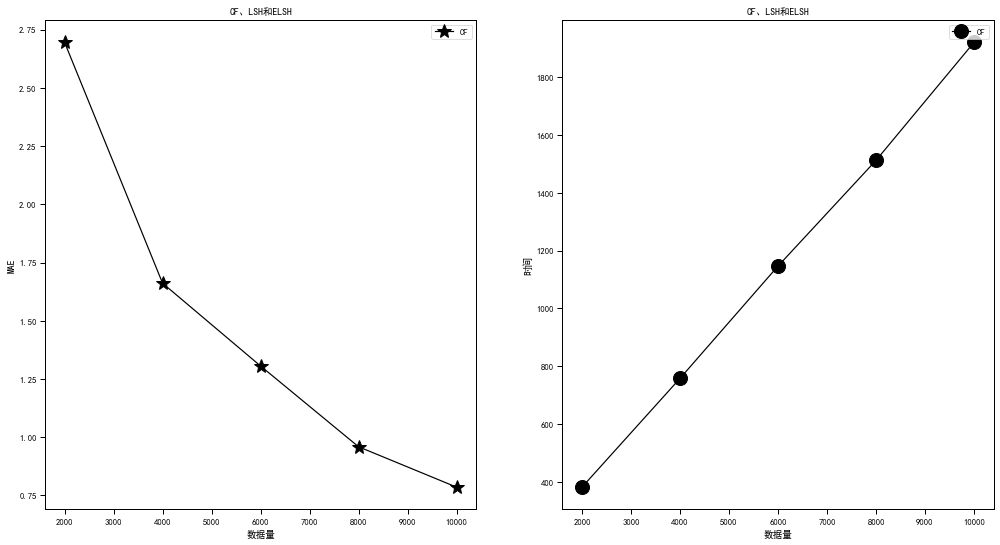

In [9]:
leg = []
leg.append("CF"),leg.append("LSH"),leg.append("ELSH ")
print("各个算法的误差为:{0}\n各个所用的时间为{1}".format(bits_dic,times))

style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (17 , 9) )
plt.subplot(121)
plt.plot(data_item,bits_dic,color = 'k',marker=style[0],markersize=14)
plt.xlabel("数据量"),plt.ylabel("MAE"),plt.title("CF、LSH和ELSH"),plt.legend(leg)

plt.subplot(122)
plt.plot(data_item,times,color = 'k',marker=style[1],markersize=14)
plt.xlabel("数据量"),plt.ylabel("时间"),plt.title("CF、LSH和ELSH"),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//CF_LSH_ELSH1.jpg',dpi=500)
plt.show()

### num和nbits变化图

In [2]:
nbits,num_lis,d = 10,[1,2,3,4,5,6,7,8,9,10],2
mae = [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 
3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565] 
times = [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 
535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]  

<Figure size 720x216 with 0 Axes>

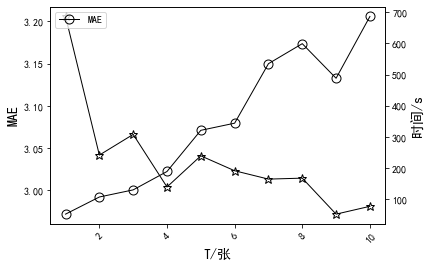

In [11]:
import matplotlib.pyplot as plt
import numpy as np
 
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
 
if __name__ == '__main__':
    plt.figure(2 , figsize = (10 , 3) )
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
    style = ["*","o","^","s","X","<",">","p","h","1","2"]

    ax1.set_xlabel("T/张",fontsize=14)
    ax1.set_ylabel("MAE", fontsize=14)
    ax1.plot(num_lis,mae,color = 'k',marker=style[0],markersize=9,linewidth=1,markerfacecolor='none')
 
    leg = []
    leg.append("MAE"),leg.append("时间")

    ax2 = ax1.twinx()
    ax2.set_ylabel("时间/s",fontsize=14)
    ax2.plot(num_lis,times,color = 'k',marker=style[1],markersize=9,linewidth=1, markerfacecolor='none')
    plt.legend(leg)
    fig=plt.gcf()
    fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_num_time_MAE3.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
    plt.show()
    plt.show()

mae: [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565]
times: [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]


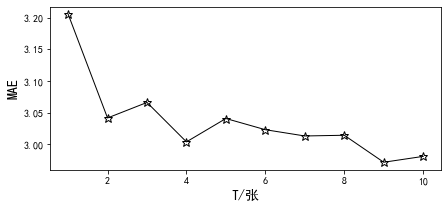

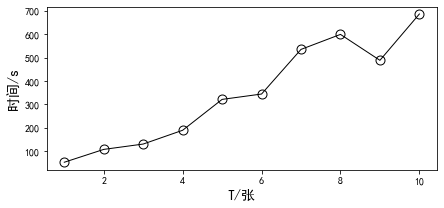

In [15]:

print("mae:",mae)
print("times:",times)
# data.to_csv("../GIS_LSH_VE_CF/data/predict_data.csv")
style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )

# plt.subplot(121)
plt.plot(num_lis,mae,color = 'k',marker=style[0],markersize=9,linewidth=1,markerfacecolor='none')
plt.xlabel("T/张", fontsize=14)
plt.ylabel("MAE", fontsize=14)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_num_time_MAE1.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
# plt.title("LSH误差随b的变化")
# plt.subplot(122)
plt.figure(2 , figsize = (7 , 3) )
plt.plot(num_lis,times,color = 'k',marker=style[1],markersize=9,linewidth=1, markerfacecolor='none')
plt.xlabel("T/张",fontsize=14)
plt.ylabel("时间/s",fontsize=14)
# plt.title("LSH时间随tables的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_num_time_MAE2.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()

In [21]:
index = 0
proportion = [x for x in mae]
for i in range(len(mae)):
    proportion[i] = times[i]/mae[i]
proportion

[16.43756120238132,
 35.38817246637968,
 42.55098137646432,
 63.043997450573904,
 105.68507885255103,
 113.88261073263737,
 177.56388123950381,
 198.77189178523665,
 164.3267089609842,
 230.25300884696222]

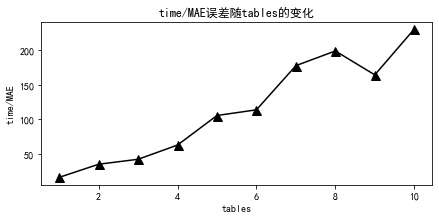

In [23]:
plt.figure(1 , figsize = (7 , 3) )

plt.plot(num_lis,proportion,color = 'k',marker="^",markersize=9)
plt.xlabel("tables")
plt.ylabel("time/MAE")
plt.title("time/MAE误差随tables的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_MAE_time.jpg',dpi=500)
plt.show()

In [11]:
nbits_lis,num_lis,d = [10,20,30,40,50,60,70,80,90,100],2,2
mae = [3.034338095194681, 3.1281544567054787, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205] 
times = [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409] 

mae: [3.034338095194681, 3.1281544567054786, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205]
times: [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409]


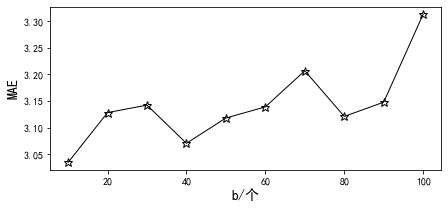

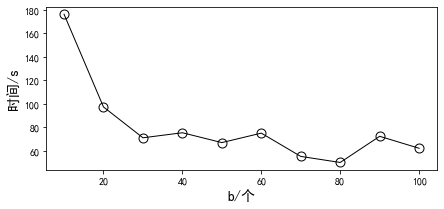

In [13]:


print("mae:",mae)
print("times:",times)
# data.to_csv("../GIS_LSH_VE_CF/data/predict_data.csv")
style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )

# plt.subplot(121)
plt.plot(nbits_lis,mae,color = 'k',marker=style[0],linewidth=1,markersize=9,markerfacecolor='none')
plt.xlabel("b/个", fontsize=14)
plt.ylabel("MAE", fontsize=14)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_nbits_time_MAE1.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
#plt.title("LSH误差随buckets的变化")
# plt.subplot(122)
plt.figure(2 , figsize = (7 , 3) )
plt.plot(nbits_lis,times,color = 'k',marker=style[1],linewidth=1,markersize=9,markerfacecolor='none')
plt.xlabel("b/个",fontsize=14)
plt.ylabel("时间/s",fontsize=14)
#plt.title("LSH时间随buckets的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_nbits_time_MAE2.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()


### MAE/time权重变化

In [25]:
index = 0
proportion = [x for x in mae]
for i in range(len(mae)):
    proportion[i] = times[i]/mae[i]
proportion

[58.07082028143857,
 31.100126647004796,
 22.61143616031871,
 24.536328902673898,
 21.47362627333476,
 23.896766716042706,
 17.21148975533712,
 16.03521146111976,
 22.971780036507173,
 18.74847352123545]

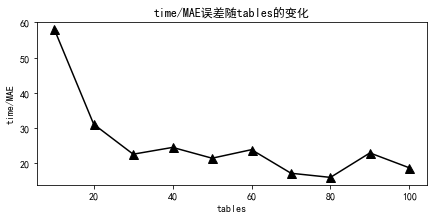

In [27]:
plt.figure(1 , figsize = (7 , 3) )

plt.plot(nbits_lis,proportion,color = 'k',marker="^",markersize=9)
plt.xlabel("tables")
plt.ylabel("time/MAE")
plt.title("time/MAE误差随tables的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_MAE_time.jpg',dpi=500)
plt.show()

### CF和LSH_VE的对比

In [5]:
data_item = [2000,4000,6000,8000,10000]
bits_dic = {0: [2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142], 1: [2.656784127948325, 1.6266065549461248, 1.286687804508825, 1.090475350084425, 0.8677701116945999], 2: [2.6886133612230747, 1.64250927387285, 1.302546027911725, 1.106327935520575, 0.883603570520125]}
times = {0: [379.32889914512634, 764.2643761634827, 1175.7989473342896, 1559.0139877796173, 1934.7203288078308], 1: [72.31787586212158, 135.21740293502808, 214.49260234832764, 293.841189622879, 365.40583300590515], 2: [103.57593989372253, 194.49724173545837, 307.56843185424805, 520.6254773139954, 685.0465750694275]}

各个算法的误差为:{0: [2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142], 1: [2.656784127948325, 1.6266065549461248, 1.286687804508825, 1.090475350084425, 0.8677701116945999], 2: [2.6886133612230747, 1.64250927387285, 1.302546027911725, 1.106327935520575, 0.883603570520125]}
各个所用的时间为{0: [379.32889914512634, 764.2643761634827, 1175.7989473342896, 1559.0139877796173, 1934.7203288078308], 1: [72.31787586212158, 135.21740293502808, 214.49260234832764, 293.841189622879, 365.40583300590515], 2: [103.57593989372253, 194.49724173545837, 307.56843185424805, 520.6254773139954, 685.0465750694275]}


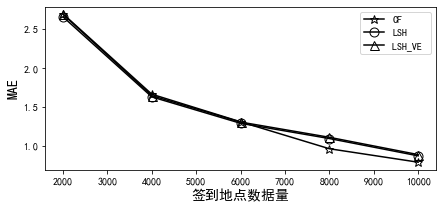

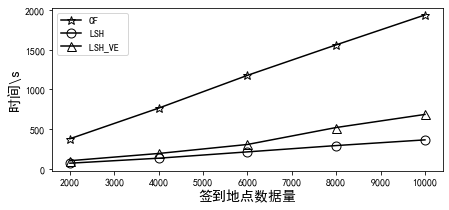

In [7]:
leg = []
leg.append("CF"),leg.append("LSH"),leg.append("LSH_VE ")
print("各个算法的误差为:{0}\n各个所用的时间为{1}".format(bits_dic,times))

style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )
for i in range(3):
    plt.plot(data_item,bits_dic[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("签到地点数据量",fontsize=14),plt.ylabel("MAE",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//CF_LSH_ELSH_MAE.jpg', bbox_inches='tight', pad_inches=0,dpi=500)

plt.figure(2 , figsize = (7 , 3) )
for i in range(3):
    plt.plot(data_item,times[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("签到地点数据量",fontsize=14),plt.ylabel("时间\s",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//CF_LSH_ELSH_time.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()

### MAE、time和proportion保留小数点后两位，做表格

In [1]:
nbits_lis,num_lis,d = [10,20,30,40,50,60,70,80,90,100],2,2
mae = [3.034338095194681, 3.1281544567054787, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205] 
times = [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409] 
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(tem_times[i]/tem_mae[i],2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.03, 3.13, 3.14, 3.07, 3.12, 3.14, 3.21, 3.12, 3.15, 3.31]
[176.21, 97.29, 71.05, 75.34, 66.95, 75.01, 55.19, 50.04, 72.31, 62.12]
[58.16, 31.08, 22.63, 24.54, 21.46, 23.89, 17.19, 16.04, 22.96, 18.77]


In [2]:
nbits,num_lis,d = 10,[1,2,3,4,5,6,7,8,9,10],2
mae = [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 
3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565] 
times = [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 
535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]  
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(tem_times[i]/tem_mae[i],2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.21, 3.04, 3.07, 3.0, 3.04, 3.02, 3.01, 3.01, 2.97, 2.98]
[52.7, 107.64, 130.47, 189.39, 321.38, 344.29, 535.06, 599.19, 488.36, 686.41]
[16.42, 35.41, 42.5, 63.13, 105.72, 114.0, 177.76, 199.07, 164.43, 230.34]


In [1]:
def score(x,y):
    return x*(y/(x+y))+y*(x/(x+y))

In [2]:
# 按比重进行划分
nbits,num_lis,d = 10,[1,2,3,4,5,6,7,8,9,10],2
mae = [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 
3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565] 
times = [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 
535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]  
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(score(tem_times[i],tem_mae[i]),2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.21, 3.04, 3.07, 3.0, 3.04, 3.02, 3.01, 3.01, 2.97, 2.98]
[52.7, 107.64, 130.47, 189.39, 321.38, 344.29, 535.06, 599.19, 488.36, 686.41]
[6.05, 5.91, 6.0, 5.91, 6.02, 5.99, 5.99, 5.99, 5.9, 5.93]


In [7]:
x = 535.06
y = 3.01
x*(y/(x+y))+y*(x/(x+y))

5.98632371252811

In [5]:
nbits_lis,num_lis,d = [10,20,30,40,50,60,70,80,90,100],2,2
mae = [3.034338095194681, 3.1281544567054787, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205] 
times = [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409] 
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(score(tem_times[i],tem_mae[i]),2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.03, 3.13, 3.14, 3.07, 3.12, 3.14, 3.21, 3.12, 3.15, 3.31]
[176.21, 97.29, 71.05, 75.34, 66.95, 75.01, 55.19, 50.04, 72.31, 60.12]
[5.96, 6.06, 6.01, 5.9, 5.96, 6.03, 6.07, 5.87, 6.04, 6.27]


## 隐私保护性能对比图

In [9]:
import numpy as np
data_item = ['10%','20%','30%','40%','50%']
bits_dic = {0: [np.array([3.50551133]), np.array([3.34311613]), np.array([3.20676872]), np.array([3.13417184]), np.array([3.27396689])],
            1: [6.00057453473025, 5.905222773019, 5.86839343451175, 5.84983533681175, 5.82366681035525], 
            2: [5.56879908936469, 5.482257565940187, 5.378909471400462, 5.240299654215233, 4.878152217964743], 
            3: [3.143133843312999, 3.143133843312999, 3.143133843312999, 3.1142625279622496, 3.1142625279622496]}
times = {0: [2.5579519271850586, 2.6792068481445312, 2.8645882606506348, 3.085078716278076, 3.3582217693328857],
         1: [2.662523031234741, 2.8015801906585693, 2.990777015686035, 3.237675666809082, 3.564932346343994],
         2: [86.6716833114624, 173.370361328125, 259.95303869247437, 346.1823992729187, 432.90528416633606],
         3: [3.449453592300415, 3.59232234954834, 3.8109052181243896, 4.058547258377075, 4.382606267929077]}

In [14]:
import numpy as np
data_item = ['10%','20%','30%','40%','50%']
bits_dic = {0: [2.9929030738736925,3.255818920201389, 3.712800743332887,4.068192853773357, 4.712800743332887],
            1: [2.8155994893514999,3.1962809388913499,3.3048116514201748,3.71528981120675,4.1324470749225724],
            2: [2.5555994893514999,2.784470749225724, 2.92528981120675, 3.2148116514201748, 3.55762809388913499],
            3: [2.5555994893514999,2.784470749225724, 2.92528981120675, 3.2148116514201748, 3.55762809388913499]
            }
times = {0: [529.875956296921,  341.7878003120422, 156.0913791656494, 61.7878003120422, 30.875956296921],
         1: [687.650682926178,390.1801013946533, 280.0774335861206, 100.1801013946533, 87.650682926178],
         2: [1900.005819797516,1975.005819797516,2000.5819797516, 2059.005819797516, 2025.005819797516], 
         3: [2.5555994893514999,2.784470749225724, 2.92528981120675, 3.2148116514201748, 3.55762809388913499]}


#### 对用户数据加密的对比

各个算法的误差为:{0: [2.9929030738736926, 3.255818920201389, 3.712800743332887, 4.068192853773357, 4.712800743332887], 1: [2.8155994893515, 3.19628093889135, 3.3048116514201746, 3.71528981120675, 4.132447074922572], 2: [2.5555994893514997, 2.784470749225724, 2.92528981120675, 3.2148116514201748, 3.557628093889135], 3: [2.5555994893514997, 2.784470749225724, 2.92528981120675, 3.2148116514201748, 3.557628093889135]}
各个所用的时间为{0: [529.875956296921, 341.7878003120422, 156.0913791656494, 61.7878003120422, 30.875956296921], 1: [687.650682926178, 390.1801013946533, 280.0774335861206, 100.1801013946533, 87.650682926178], 2: [1900.005819797516, 1975.005819797516, 2000.5819797516, 2059.005819797516, 2025.005819797516], 3: [2.5555994893514997, 2.784470749225724, 2.92528981120675, 3.2148116514201748, 3.557628093889135]}


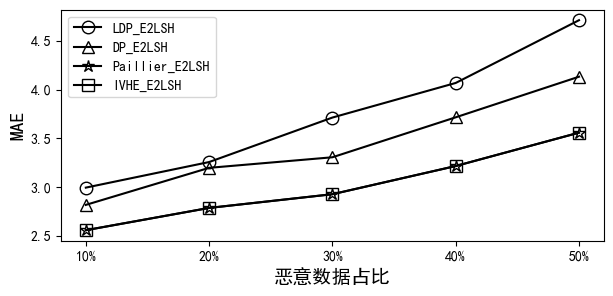

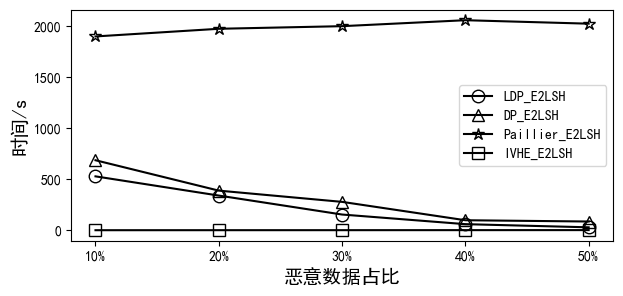

In [16]:
leg = []
leg.append("LDP_E2LSH"),leg.append("DP_E2LSH"),leg.append("Paillier_E2LSH"),leg.append("IVHE_E2LSH")
print("各个算法的误差为:{0}\n各个所用的时间为{1}".format(bits_dic,times))

style = ["o","^","*","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )
for i in range(4):
    plt.plot(data_item,bits_dic[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("恶意数据占比",fontsize=14),plt.ylabel("MAE",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//attack_cmp_mae.jpg', bbox_inches='tight', pad_inches=0,dpi=500)

plt.figure(2 , figsize = (7 , 3) )
for i in range(4):
    plt.plot(data_item,times[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("恶意数据占比",fontsize=14),plt.ylabel("时间/s",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//attack_cmp_time.jpg',bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()

# 推荐效果对比

In [6]:
import numpy as np
data_item = [2000,4000,6000,8000,10000]
bits_dic  = {0:[np.np.array([3.06774524]), np.array([1.36008353]), np.np.np.np.np.array([1.00613969]), np.array([0.70423054]), np.array([0.44508698])],
            1: [4.753835949796274, 3.399705217306475, 2.2999580782651, 1.60302326440205, 1.2866514464807], 
            
            2: [3.3368305302746, 1.5338613021435, 1.1989122747439749, 0.9745414449901251, 0.759424083149025],
            3: [np.array([3.36568507]), np.array([1.51764469]), np.array([1.20817247]), np.array([0.90879183]), np.array([0.7371928])]}

times = {0: [447.7674014568329, 855.2623167037964, 1295.8968679904938, 1759.54514503479, 2158.574114084244], 
        1: [187.4344024658203, 346.3747522830963, 538.9868366718292, 725.2708673477173, 893.4635329246521], 
       
        2: [174.73185014724731, 365.60278248786926, 594.1489272117615, 807.4475474357605, 1026.3684644699097],
        3: [135.05075573921204, 262.6632750034332, 415.2582895755768, 565.2751431465149, 698.5041723251343]}

AttributeError: module 'numpy' has no attribute 'np'

In [17]:
data_item = [1000,2000,3000,4000,5000]
bits_dic  ={0: [3.821667001803, 2.39353605840075, 1.6136015116452504, 1.4660226250817506, 1.3187541722630007], 
            1: [np.array([2.57032085]), np.array([2.22486654]), np.array([2.00117797]), np.array([2.281972]), np.array([1.84745553])], 
            2: [1.9695959487259986, 1.3181865750037496, 1.2132716614202501, 0.9299261160907502, 0.77514312014962501], 
            3: [1.9695959487259993, 1.318186575003749, 1.2133455591147497, 0.9199979216612498, 0.7514907522727497],
            4: [np.array([1.91502753]), np.array([1.41759883]), np.array([1.22263474]), np.array([0.80688421]), np.array([0.67171688])], 
            }

times = {0: [3.7967119216918945, 10.68479871749878, 21.75168251991272, 36.67541146278381, 54.911930322647095],
         1: [4.315584659576416, 12.265635967254639, 25.0141499042511, 41.680752992630005, 62.260639667510986],
         2: [13.030805587768555, 36.51826477050781, 72.92271828651428, 122.57067346572876, 184.9560947418213], 
         3: [5.062875032424927, 14.32990837097168, 29.094423055648804, 49.31172728538513, 75.07130312919617],
         4: [3.6355338096618652, 10.6674063205719, 21.528699159622192, 37.01614236831665, 56.00767421722412]
         }

各个算法的误差为:{0: [3.821667001803, 2.39353605840075, 1.6136015116452505, 1.4660226250817505, 1.3187541722630007], 1: [array([2.57032085]), array([2.22486654]), array([2.00117797]), array([2.281972]), array([1.84745553])], 2: [1.9695959487259986, 1.3181865750037496, 1.2132716614202501, 0.9299261160907502, 0.775143120149625], 3: [1.9695959487259993, 1.318186575003749, 1.2133455591147497, 0.9199979216612498, 0.7514907522727498], 4: [array([1.91502753]), array([1.41759883]), array([1.22263474]), array([0.80688421]), array([0.67171688])]}
各个所用的时间为{0: [3.7967119216918945, 10.68479871749878, 21.75168251991272, 36.67541146278381, 54.911930322647095], 1: [4.315584659576416, 12.265635967254639, 25.0141499042511, 41.680752992630005, 62.260639667510986], 2: [13.030805587768555, 36.51826477050781, 72.92271828651428, 122.57067346572876, 184.9560947418213], 3: [5.062875032424927, 14.32990837097168, 29.094423055648804, 49.31172728538513, 75.07130312919617], 4: [3.6355338096618652, 10.6674063205719, 21.5286

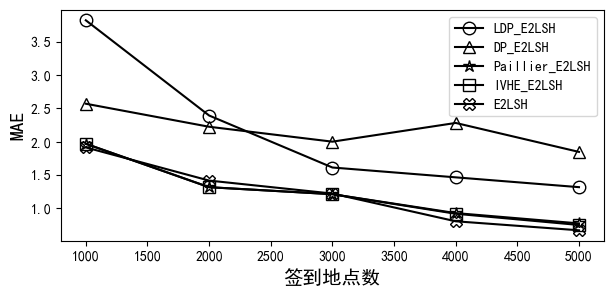

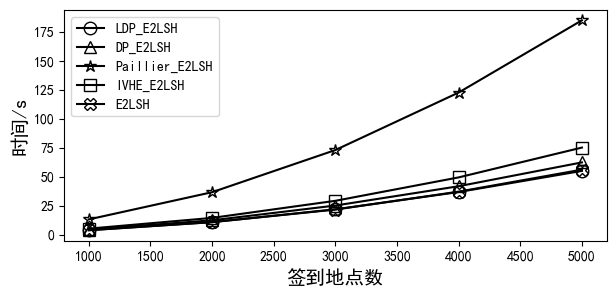

In [19]:
leg = []
leg.append("LDP_E2LSH"),leg.append("DP_E2LSH"),leg.append("Paillier_E2LSH"),leg.append("IVHE_E2LSH"),leg.append("E2LSH")
print("各个算法的误差为:{0}\n各个所用的时间为{1}".format(bits_dic,times))

style = ["o","^","*","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )
for i in range(5):
    plt.plot(data_item,bits_dic[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("签到地点数",fontsize=14),plt.ylabel("MAE",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//re_cmp_mae.jpg', bbox_inches='tight', pad_inches=0,dpi=800)

plt.figure(2 , figsize = (7 , 3) )
for i in range(5):
    plt.plot(data_item,times[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("签到地点数",fontsize=14),plt.ylabel("时间/s",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//re_cmp_time.jpg',bbox_inches='tight', pad_inches=0,dpi=800)
plt.show()

In [4]:
data_item = [2000,4000,6000,8000,10000]
bits_dic  = {0: [3.2340515302575232, 2.1555268101756493, 1.4143286523437713, 1.2754302844482155, 1.1788079897819674], 1: [10.64911413164625, 12.72078367949775, 11.017394186066001, 11.460223930038, 10.59818805232825], 2: [np.array([2.15012596]), np.array([2.81994331]), np.array([4.14178147]), np.array([3.21213672]), np.array([3.12709047])], 3: [np.array([1.94452663]), np.array([2.79100318]), np.array([4.05445189]), np.array([3.09177453]), np.array([3.24659435])], 4: [2.1707489681432492, 2.757124165218249, 4.129410711728751, 3.3772888930847507, 3.236643406456251]}

times = {0: [22.91930055618286, 92.79851412773132, 226.7387137413025, 406.002454996109, 633.7459745407104], 1: [13.977090120315552, 40.29862403869629, 83.15853214263916, 140.6587414741516, 212.51867580413818], 2: [12.94339656829834, 36.284581422805786, 73.46719527244568, 124.64342308044434, 175.8253893852234], 3: [10.554912805557251, 29.41846537590027, 58.43845200538635, 95.77348065376282, 141.13591122627258], 4: [15.843315124511719, 46.73240947723389, 95.01366329193115, 163.83252263069153, 238.5653157234192]}

各个算法的误差为:{0: [3.2340515302575232, 2.1555268101756493, 1.4143286523437713, 1.2754302844482155, 1.1788079897819674], 1: [10.64911413164625, 12.72078367949775, 11.017394186066001, 11.460223930038, 10.59818805232825], 2: [array([2.15012596]), array([2.81994331]), array([4.14178147]), array([3.21213672]), array([3.12709047])], 3: [array([1.94452663]), array([2.79100318]), array([4.05445189]), array([3.09177453]), array([3.24659435])], 4: [2.1707489681432492, 2.757124165218249, 4.129410711728751, 3.3772888930847507, 3.236643406456251]}
各个所用的时间为{0: [22.91930055618286, 92.79851412773132, 226.7387137413025, 406.002454996109, 633.7459745407104], 1: [13.977090120315552, 40.29862403869629, 83.15853214263916, 140.6587414741516, 212.51867580413818], 2: [12.94339656829834, 36.284581422805786, 73.46719527244568, 124.64342308044434, 175.8253893852234], 3: [10.554912805557251, 29.41846537590027, 58.43845200538635, 95.77348065376282, 141.13591122627258], 4: [15.843315124511719, 46.73240947723389, 95.0136

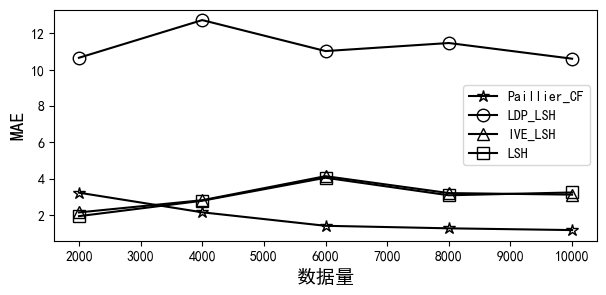

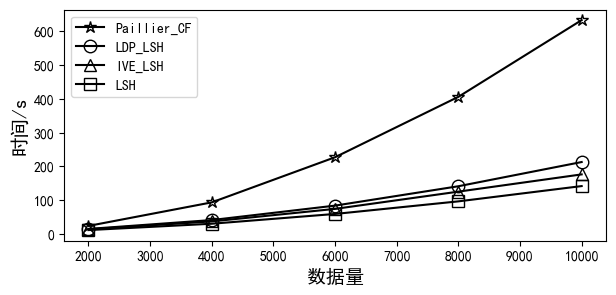

In [5]:
leg = []
leg.append("Paillier_CF"),leg.append("LDP_LSH"),leg.append("IVE_LSH"),leg.append("LSH")
print("各个算法的误差为:{0}\n各个所用的时间为{1}".format(bits_dic,times))

style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )
for i in range(4):
    plt.plot(data_item,bits_dic[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("数据量",fontsize=14),plt.ylabel("MAE",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//re_cmp_mae.jpg', bbox_inches='tight', pad_inches=0,dpi=500)

plt.figure(2 , figsize = (7 , 3) )
for i in range(4):
    plt.plot(data_item,times[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("数据量",fontsize=14),plt.ylabel("时间/s",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//re_cmp_time.jpg',bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()